## Loading the CSVs

In [45]:
files <- paste0("data/", list.files(path = "data/", pattern = "8\\.csv$"))
df <- read.csv(files[1])
for (f in files[-1]) {
    df <- rbind(df, read.csv(f))
}

df <- df[, names(df) != "X"] # All of the lines in the CSVs have a weird extra comma at the end that gets interpreted as an unnamed column.
print(nrow(df))
head(df, 5)

[1] 1519334


YEAR,QUARTER,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,FL_DATE,AIRLINE_ID,CARRIER,TAIL_NUM,FL_NUM,⋯,CRS_ELAPSED_TIME,ACTUAL_ELAPSED_TIME,AIR_TIME,FLIGHTS,DISTANCE,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY
2015,3,8,8,6,2015-08-08,19690,HA,N491HA,248,⋯,47,42,27,1,163,NA,NA,NA,NA,NA
2015,3,8,9,7,2015-08-09,19690,HA,N493HA,248,⋯,47,41,28,1,163,NA,NA,NA,NA,NA
2015,3,8,10,1,2015-08-10,19690,HA,N491HA,248,⋯,47,45,26,1,163,NA,NA,NA,NA,NA
2015,3,8,11,2,2015-08-11,19690,HA,N485HA,248,⋯,47,46,27,1,163,NA,NA,NA,NA,NA
2015,3,8,12,3,2015-08-12,19690,HA,N485HA,248,⋯,47,38,26,1,163,NA,NA,NA,NA,NA


## Getting column descriptions

In [41]:
column_labels <- read.csv("data/701878033_T_ONTIME_ReadMe.csv")
column_labels <- column_labels[, names(column_labels) != "X"]

describe_column <- function(col_name) {
    if (col_name %in% column_labels$SYS_FIELD_NAME) {
        return(as.character(column_labels[column_labels$SYS_FIELD_NAME == col_name, "X.FIELD_DESC"]))
    } else {
        return("Unknown column")
    }
}

## Some basic views of the data

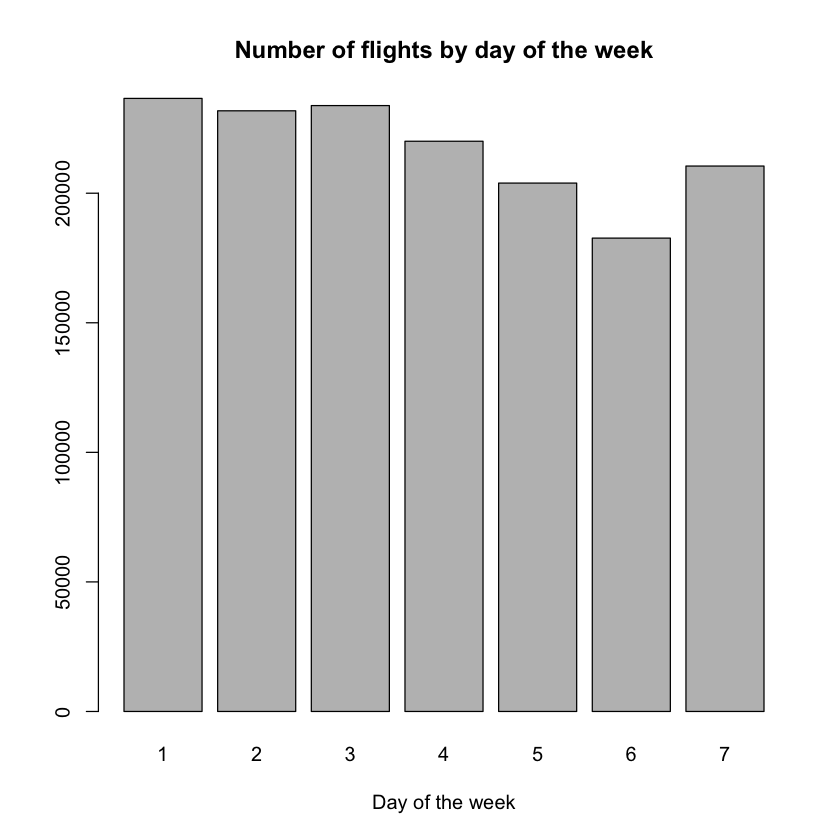

In [47]:
# Number of flights by day of the week

counts <- table(df$DAY_OF_WEEK)
barplot(
    counts,
    main = "Number of flights by day of the week",
    xlab = "Day of the week"
)

In [55]:
# Total number of flights by airport

dest_counts = as.data.frame(table(df$DEST))
orig_counts = as.data.frame(table(df$ORIGIN))
total_counts = data.frame(
    airport = dest_counts$Var1,
    dest_freq = dest_counts$Freq,
    orig_freq = orig_counts$Freq
)

print(dest_counts[1:10,])
print(orig_counts[1:10,])
print(total_counts[1:10,])

ERROR: Error in data.frame(airport = dest_counts$Var1, dest_freq = dest_counts$Freq, : arguments imply differing number of rows: 316, 317
